
#Part 1


# Minimizer:

The function is minimized when $x_1+2x_2 = 0$, and any point on the line $x_1 = -2x_2$ achieves this minimum value of 0.

# Uniqueness of Minimizer:

The minimizer is not unique since any point on the line $x_1 = -2x_2$ minimizes the function.
Global Minima:

The function achieves its minimum value of 0 globally, making it a global minimum.

#Convexity:

$\textbf{1.}$ $f(x)= (x_1+2x_2)^2$:

$f(x)$ is convex because it is a quadratic function, and all quadratic functions are convex.


$\textbf{2.}$ $g(x)$:

 can be considered convex in the context of convex optimization due to the convexity of its epigraph, despite not being a continuous function. The epigraph of $g(x)$ comprises convex regions, which leads to its considered convexity.

#part 2
Yes, we can apply the algorithm to the function \( f(x) = (x_1 + 2x_2)^2 \):

1. **Transformation of the problem**: We'll consider the equivalent problem \( \min_{y \in \mathbb{R}^n} g(y) \), where \( g(y) = f(My) \), with \( x = My \).

2. **Gradient descent update**: The update rule for solving \( \min_{y \in \mathbb{R}^n} g(y) \) becomes \( y_{k+1} = y_k - \eta \nabla_y g(y_k) \), where \( \nabla_y g(y) = M^T \nabla_x f(x) \).

3. **Pre-multiplication by \( M \)**: This yields the update rule \( M y_{k+1} = M y_k - \eta M \nabla_y g(y_k) \), which implies \( x_{k+1} = x_k - \eta M M^T \nabla_x f(x_k) \).

4. **Choice of scaling matrix \( D \)**: Letting \( D = MM^T \), we have \( x_{k+1} = x_k - \eta D \nabla f(x_k) \).

5. **Choice of matrix \( M \)**: A useful choice for \( M \) is \( M = B = D^{1/2} \), where \( D \) is a symmetric and positive definite matrix.

Given \( f(x) = (x_1 + 2x_2)^2 \), we can compute the gradient and Hessian matrices, then proceed with the updates as described above. The scaling matrix \( D \) can be constructed from the Hessian. We'll then apply gradient descent with this scaling matrix to solve the minimization problem.



In [2]:
import numpy as np

def objective_function(u):
    return u[0]**2 + 4*u[0]*u[1] + 4*u[1]**2

def gradient(u):
    return np.array([2*u[0] + 4*u[1], 8*u[1] + 4*u[0]])

def get_step_size_with_scaling(u, alpha0, rho, gamma, D):
    alpha = alpha0
    p = -gradient(u)
    while objective_function(u + alpha*D @ p) > (objective_function(u) + gamma*alpha*gradient(u) @ D @ p):
        alpha = rho * alpha
    return alpha

def coordinate_descent(u0, tolerance, alpha, rho, gamma):
    u = np.copy(u0)
    u_history = []
    u_history.append(u0)
    iteration_count = 0

    while np.linalg.norm(gradient(u)) > tolerance:
        i = np.random.randint(len(u))
        Dk = np.zeros((len(u), len(u)))
        Dk[i, i] = 1.
        eta = get_step_size_with_scaling(u, alpha, rho, gamma, Dk)
        u = u - eta * Dk @ gradient(u)
        iteration_count += 1
        u_history.append(u)

    return iteration_count, u, u_history, objective_function(u)

--------------------------------------------------------------------------
Row 0.9
Iterations = 5
Minimizer = [ 0.9984084  -0.49920321]
Final value = 3.912092871871664e-12


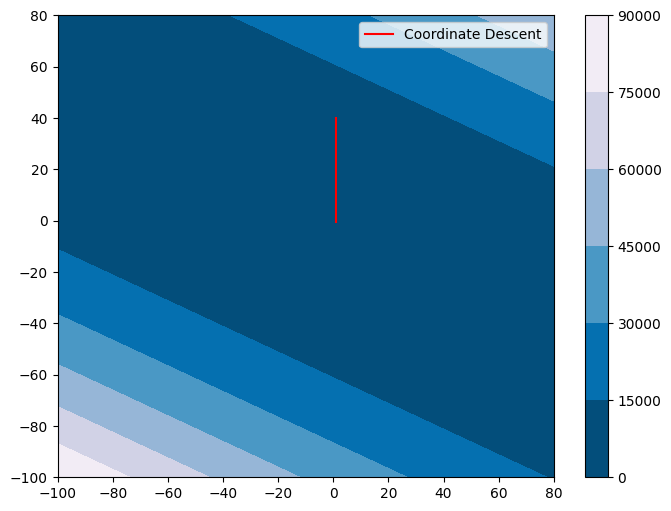

--------------------------------------------------------------------------
Row 0.8
Iterations = 10
Minimizer = [-79.91511883  39.95756013]
Final value = 1.8189894035458565e-12


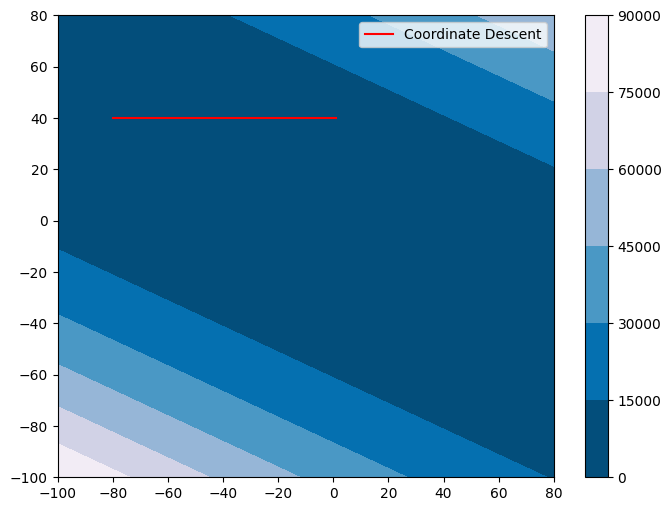

--------------------------------------------------------------------------
Row 0.75
Iterations = 10
Minimizer = [-2.20926431  1.10463288]
Final value = 2.112088282046898e-12


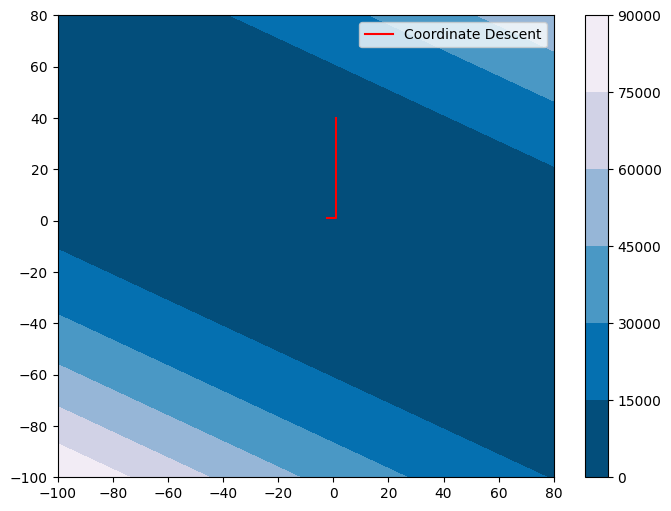

--------------------------------------------------------------------------
Row 0.6
Iterations = 16
Minimizer = [-79.5237413   39.76187151]
Final value = 2.7284841053187847e-12


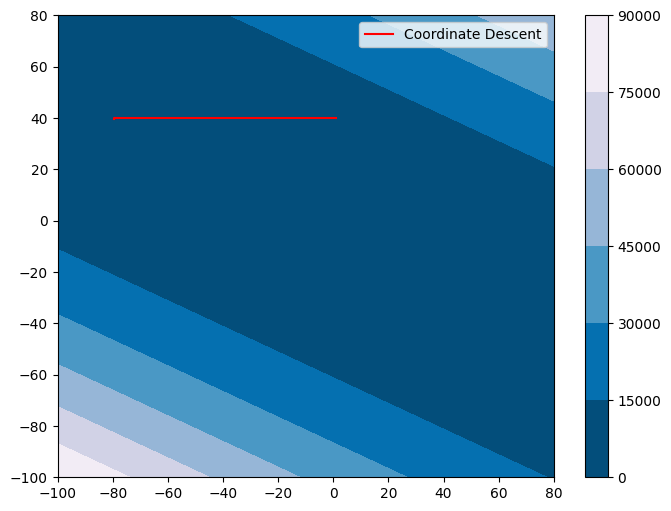

--------------------------------------------------------------------------
Row 0.5
Iterations = 1
Minimizer = [-80.  40.]
Final value = 0.0


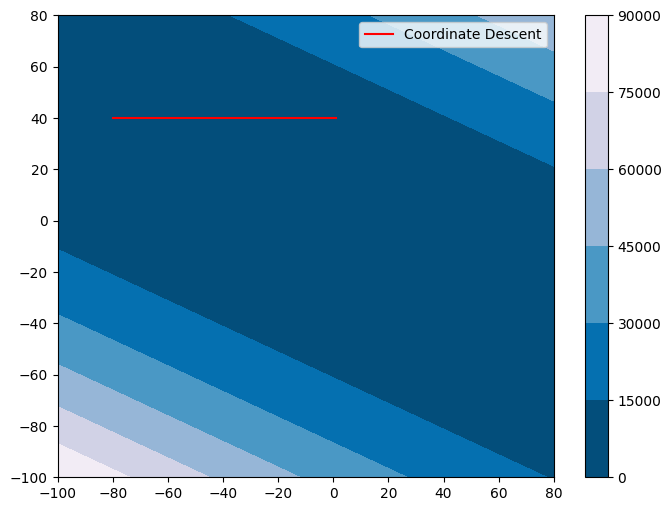

--------------------------------------------------------------------------
Row 0.4
Iterations = 16
Minimizer = [-67.53471162  33.76735614]
Final value = 9.094947017729282e-13


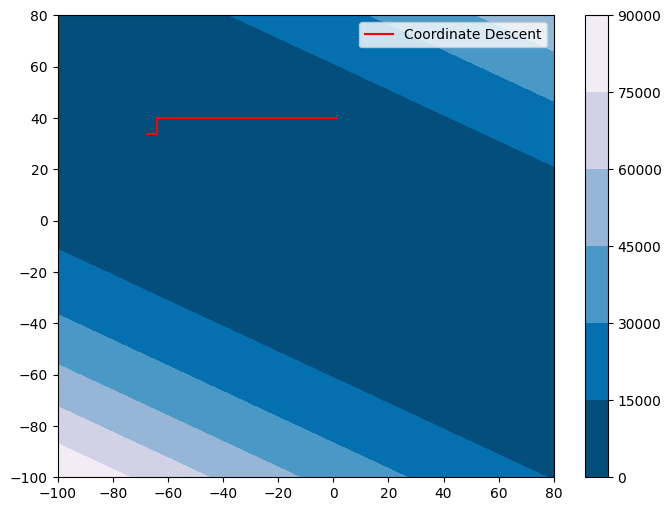

--------------------------------------------------------------------------
Row 0.25
Iterations = 26
Minimizer = [-68.41698135  34.20849128]
Final value = 9.094947017729282e-13


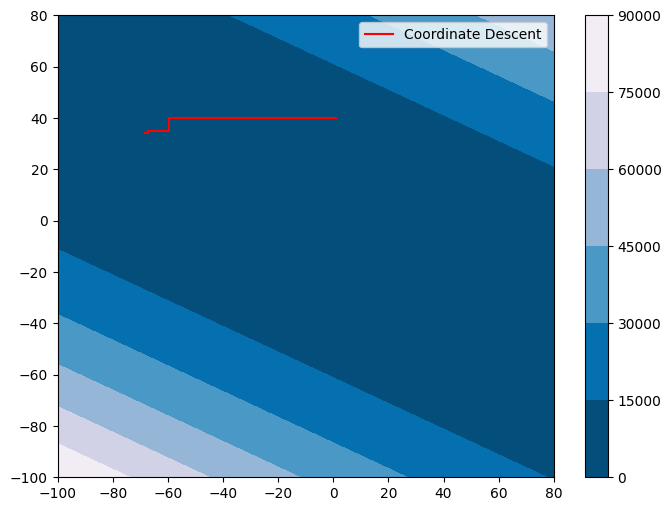

--------------------------------------------------------------------------
Row 0.1
Iterations = 21
Minimizer = [ 0.96842417 -0.48421173]
Final value = 5.075939668586216e-13


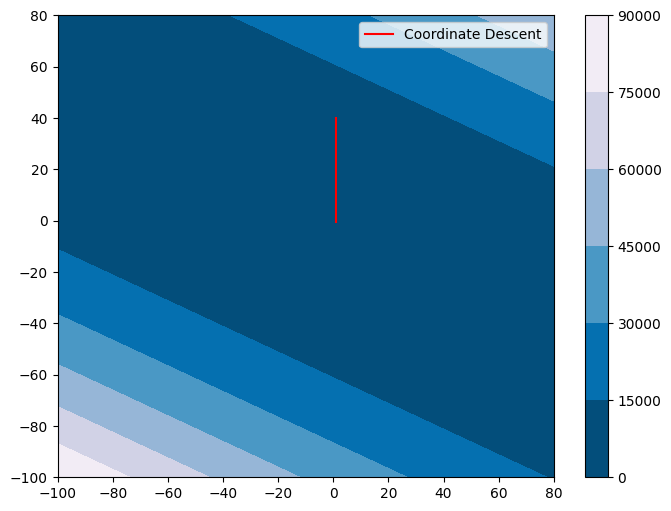

--------------------------------------------------------------------------
Row 0.01
Iterations = 345
Minimizer = [-18.561444     9.28072306]
Final value = 4.547473508864641e-12


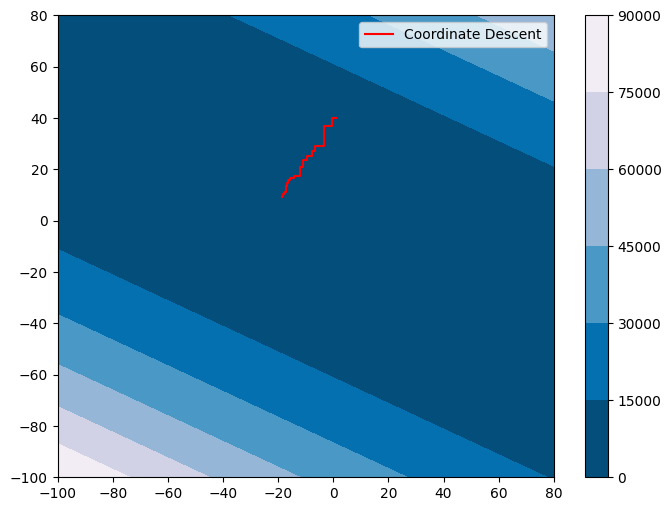

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
x0 = np.array([1., 40.])
alpha = 1
gamma = 0.5
rows = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

tolerance = 10**(-5)
iterations_list = []

for row in rows:
    iterations, minimizer, x_history, final_value = coordinate_descent(x0, tolerance, alpha, row, gamma)
    iterations_list.append(iterations)

    print('--------------------------------------------------------------------------')
    print('Row', row)
    print('Iterations =', iterations)
    print('Minimizer =', minimizer)
    print('Final value =', final_value)
    x = np.linspace(-100, 80, 1000)
    y = np.linspace(-100, 80, 1000)
    X, Y = np.meshgrid(x, y)
    Z = objective_function(np.array([X, Y]))

    x_values = [x[0] for x in x_history]
    y_values = [x[1] for x in x_history]

    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, cmap=cm.PuBu_r)
    plt.colorbar()
    plt.plot(x_values, y_values, color='red', label='Coordinate Descent')
    plt.legend()
    plt.show()


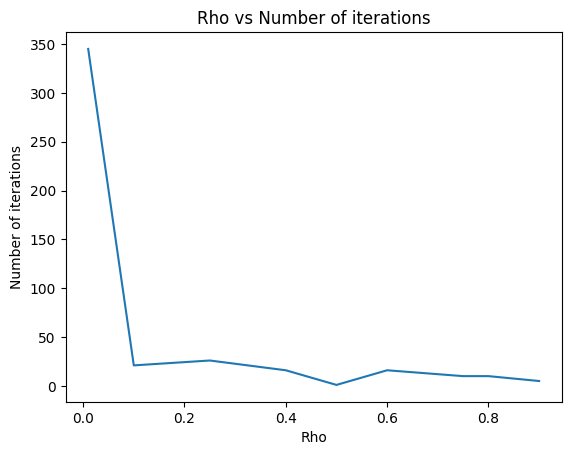

In [7]:
plt.plot(rows, iterations_list)
plt.xlabel("Rho")
plt.ylabel("Number of iterations")
plt.title("Rho vs Number of iterations")
plt.show()

# Observation:
The line plot illustrates that the number of iterations generally ranges from 1 to 26 for different values of rho. However, when the value of rho is set to 0.01, there is a substantial increase in the number of iterations, reaching 346. This suggests that a lower value of rho can lead to a significant increase in the computational effort required for convergence.


#Part 3

# Evaluation of Proximal Operator for \( \lambda t(x) \)

To evaluate \( \text{prox}_{\lambda t}(y) \), where \( t(z) \) is the linearization of a function \( g(z) \) around a fixed point \( y \), we need to find the proximal operator of \( t \) with parameter \( \lambda \). The proximal operator of \( t \) with parameter \( \lambda \) is defined as:

\[ \text{prox}_{\lambda t}(y) = \arg \min_{z \in \mathbb{R}^d} \left\{ t(z) + \frac{1}{2\lambda} \|z - y\|^2 \right\} \]

Given that \( t(z) \) represents the linearization of \( g(z) \) around \( y \), we express it as:

\[ t(z) = g(y) + \langle \nabla g(y), z - y \rangle \]

where \( \langle ., . \rangle \) denotes the dot product. Substituting this expression into the definition of \( \text{prox}_{\lambda t}(y) \), we obtain:

\[ \text{prox}_{\lambda t}(y) = \arg \min_{z \in \mathbb{R}^d} \left\{ g(y) + \langle \nabla g(y), z - y \rangle + \frac{1}{2\lambda} \|z - y\|^2 \right\} \]

\[ \text{prox}_{\lambda t}(y) = \arg \min_{z \in \mathbb{R}^d} \left\{ g(y) + \langle \nabla g(y), z - y \rangle + \frac{1}{2\lambda} \left( \|z\|^2 - 2\langle z, y \rangle + \|y\|^2 \right) \right\} \]

Since \( \|y\|^2 \) and \( g(y) \) are constants with respect to \( z \) in this minimization problem, we disregard them. Additionally, the term \( \frac{1}{2\lambda} \|z\|^2 \) does not vary with \( z \) and can be treated as a constant. Consequently, the minimization problem simplifies to:

$$ prox_{λt}(y) = arg \min_{z \in \mathbb{R}^d} \left\{ ⟨∇g(y), z - y⟩ + \frac{1}{2λ}||z||^2 - \frac{1}{λ} ⟨z, y⟩ \right\} $$

To find the minimizer z*, we can take the derivative of the objective function with respect to z and set it to zero:

$$ ∇\left(⟨∇g(y), z - y⟩ + \frac{1}{2λ}||z||^2 - \frac{1}{λ} ⟨z, y⟩\right) = 0 $$

Simplifying, we get:

$$ ∇\left(⟨∇g(y), z⟩ - ⟨∇g(y), y⟩ + \frac{1}{2λ} ||z||^2 - \frac{1}{λ} ⟨z, y⟩\right) = 0 $$

$$ ∇\left(⟨∇g(y), z⟩ + \frac{1}{2λ} ||z||^2 - ⟨∇g(y), y⟩ - \frac{1}{λ} ⟨z, y⟩\right) = 0 $$

Using the fact that $∇⟨a, b⟩ = a$ for any constant vector a and differentiable function b, and $∇||z||^2 = 2z$, we can simplify further:

$$ ∇\left(⟨∇g(y), z⟩ + \frac{1}{2λ} ||z||^2 - ⟨∇g(y), y⟩ -\frac{1}{λ} ⟨z, y⟩\right) = ∇⟨∇g(y), z⟩ + \frac{1}{λ} y - ⟨∇g(y), y⟩ - \frac{1}{λ} y = 0 $$

Rearranging terms, we get:

$$ ∇⟨∇g(y), z⟩ + \frac{1}{λ} (y - z) = 0 $$

This is a linear equation in z. Solving for z, we get:

$$ z^* = y - λ∇g(y) $$

This is the minimizer of the proximal operator $ prox_{λt}(y) $. It is interesting to note that this result is similar to the update step in the proximal gradient descent algorithm, where we update the current iterate y by subtracting λ times the gradient of the function at y. The proximity operator captures the essence of this update step by finding the point that minimizes the function plus a quadratic penalty term that penalizes the distance from the current point y.


#part 4

In [8]:
def objective_function(x):
    return (x[0] - 1) ** 2 + x[1] ** 2 + (x[2] + 1) ** 2

def gradient_objective(x):
    return np.array([2 * (x[0] - 1), 2 * x[1], 2 * (x[2] + 1)])

def proximal_operator(x):
    return [max(0, val) for val in x]

alpha = 0.3

def gradient_descent_with_backtracking(x0, iterations):
    x = np.copy(x0)
    count = 0
    pk = -1 * gradient_objective(x)
    x_history = []
    x_history.append(x)

    while count < iterations:
        pk = -1 * gradient_objective(x)
        x = x + alpha * pk
        x = proximal_operator(x)
        x_history.append(x)
        count += 1

    return count, x, objective_function(x), x_history

iterations_list = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]
initial_point = np.array([0, 0, 0])

for iterations in iterations_list:
    count, minimizer, minimum_value, x_history = gradient_descent_with_backtracking(initial_point, iterations)
    print('----------------------------------------------------------------------------------------')
    print("For iterations =", iterations)
    print("Number of iterations:", count)
    print("Minimizer:", minimizer)
    print("Minimum value:", minimum_value)


----------------------------------------------------------------------------------------
For iterations = 100
Number of iterations: 100
Minimizer: [1.0, 0, 0]
Minimum value: 1.0
----------------------------------------------------------------------------------------
For iterations = 500
Number of iterations: 500
Minimizer: [1.0, 0, 0]
Minimum value: 1.0
----------------------------------------------------------------------------------------
For iterations = 1000
Number of iterations: 1000
Minimizer: [1.0, 0, 0]
Minimum value: 1.0
----------------------------------------------------------------------------------------
For iterations = 5000
Number of iterations: 5000
Minimizer: [1.0, 0, 0]
Minimum value: 1.0
----------------------------------------------------------------------------------------
For iterations = 10000
Number of iterations: 10000
Minimizer: [1.0, 0, 0]
Minimum value: 1.0
----------------------------------------------------------------------------------------
For iteration

----------------------------------------------------------------------------------------
Iteration = 100
Minimizer = [0. 0.]
Minimum value = 0.25


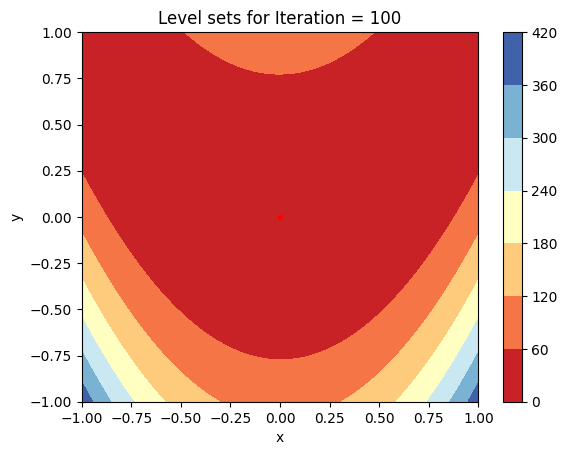

----------------------------------------------------------------------------------------
Iteration = 500
Minimizer = [0. 0.]
Minimum value = 0.25


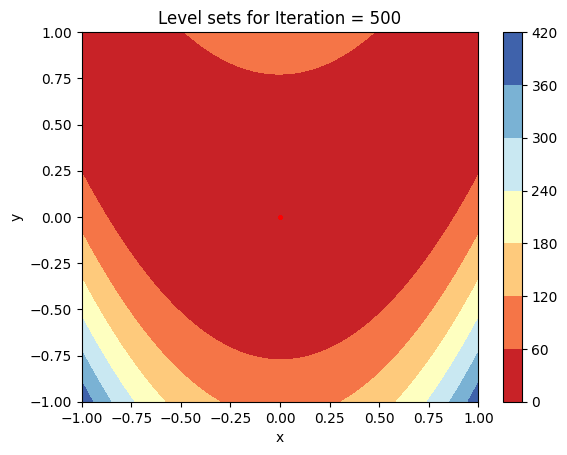

----------------------------------------------------------------------------------------
Iteration = 1000
Minimizer = [0. 0.]
Minimum value = 0.25


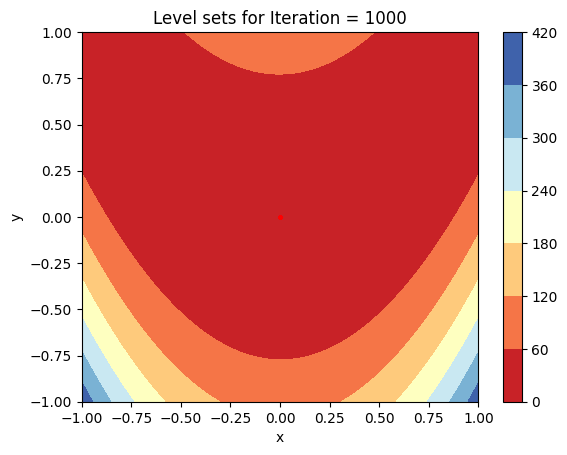

----------------------------------------------------------------------------------------
Iteration = 5000
Minimizer = [0. 0.]
Minimum value = 0.25


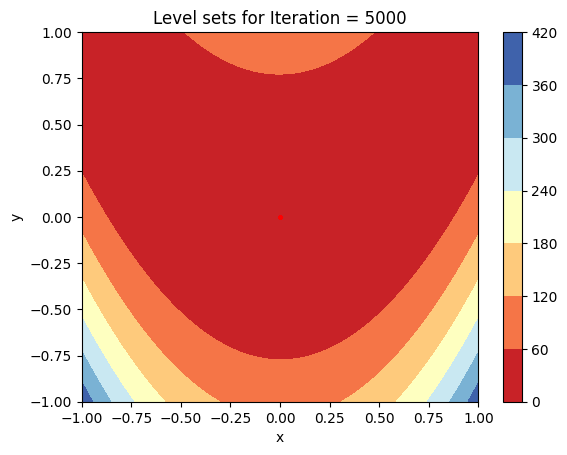

----------------------------------------------------------------------------------------
Iteration = 10000
Minimizer = [0. 0.]
Minimum value = 0.25


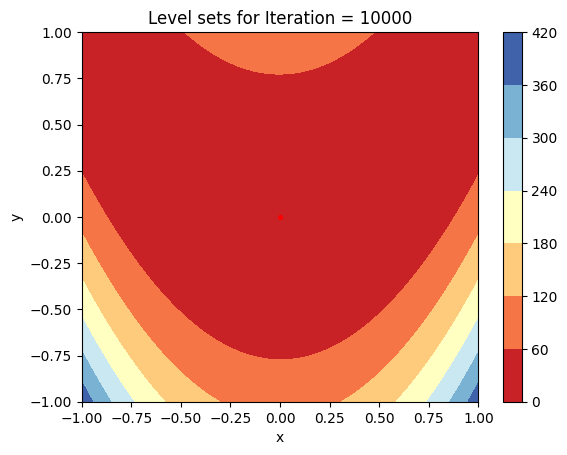

----------------------------------------------------------------------------------------
Iteration = 50000
Minimizer = [0. 0.]
Minimum value = 0.25


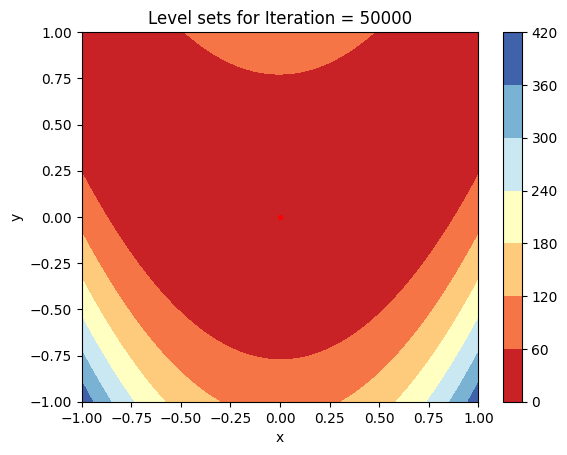

----------------------------------------------------------------------------------------
Iteration = 100000
Minimizer = [0. 0.]
Minimum value = 0.25


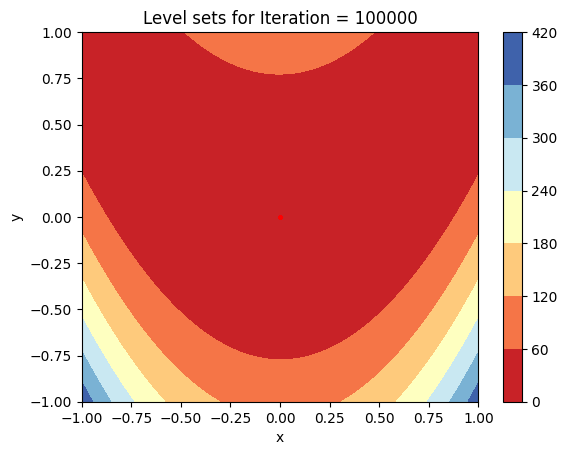

----------------------------------------------------------------------------------------
Iteration = 500000
Minimizer = [0. 0.]
Minimum value = 0.25


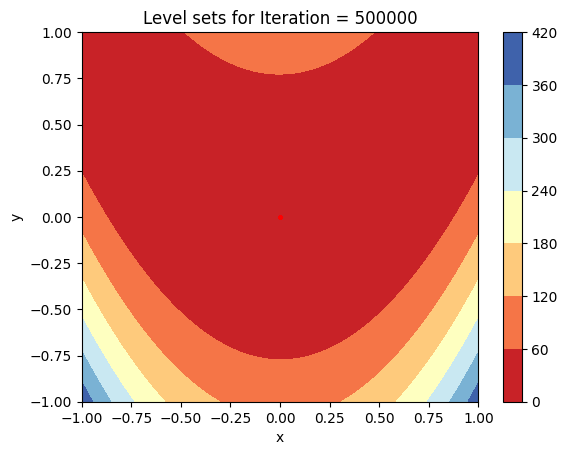

----------------------------------------------------------------------------------------
Iteration = 1000000
Minimizer = [0. 0.]
Minimum value = 0.25


In [ ]:
def objective_function(x):
    return 100*(x[1]-x[0]**2)**2 + (0.5 - x[0])**2

def gradient_objective(x):
    return np.array([-400*(x[1]-x[0]**2), 200*x[1]-x[0]**2])

def prox_operator(y):
    if np.linalg.norm(y) <= 1:
        return y
    else:
        return y / np.linalg.norm(y)

def gradient_descent_with_backtracking(x0, iterations):
    x = np.copy(x0)
    k = 0
    pk = -1 * gradient_objective(x)
    xs = []
    xs.append(x)
    alpha = 0.3

    while k < iterations:
        p = -1 * gradient_objective(x)
        x = x + alpha * p
        x = prox_operator(x)
        xs.append(x)
        k += 1
    return k, x, objective_function(x), xs

initial_point = np.array([0, 0])
iterations_list = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

for iterations in iterations_list:
    count, minimizer, minimum_value, x_history = gradient_descent_with_backtracking(initial_point, iterations)
    print('----------------------------------------------------------------------------------------')
    print("Iteration =", count)
    print("Minimizer =", minimizer)
    print("Minimum value =", minimum_value)

    # Level sets and trajectory
    x_values = np.linspace(-1, 1, 1000)
    y_values = np.linspace(-1, 1, 1000)
    X, Y = np.meshgrid(x_values, y_values)
    Z = objective_function((X, Y))
    contour_plot = plt.contourf(X, Y, Z, cmap=cm.RdYlBu)
    color_bar = plt.colorbar(contour_plot)

    for i in range(len(x_history)):
        x_coords = [x_history[i][0]]
        y_coords = [x_history[i][1]]
        plt.plot(x_coords, y_coords, color='red', marker='o', markersize=2)

    plt.title("Level sets for Iteration = " + str(iterations))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
